BLG 307 - YAPAY ZEKA SİSTEMLERİ PROJE TESLİMİ:

Adınız: Ali

Soyadınız: Uçma

Okul Numaranız: 2212721007

GitHub Repo Bağlantısı: https://github.com/Alu0320/genetik_optimizasyon

Generasyon 1: En iyi çözüm = 1697.188
Generasyon 2: En iyi çözüm = 1641.482
Generasyon 3: En iyi çözüm = 1658.445
Generasyon 4: En iyi çözüm = 1669.291
Generasyon 5: En iyi çözüm = 1835.431
Generasyon 6: En iyi çözüm = 1835.431
Generasyon 7: En iyi çözüm = 1828.791
Generasyon 8: En iyi çözüm = 1814.910
Generasyon 9: En iyi çözüm = 1850.145
Generasyon 10: En iyi çözüm = 1835.974
Generasyon 11: En iyi çözüm = 1878.385
Generasyon 12: En iyi çözüm = 1877.869
Generasyon 13: En iyi çözüm = 1880.124
Generasyon 14: En iyi çözüm = 1882.174
Generasyon 15: En iyi çözüm = 1877.109
Generasyon 16: En iyi çözüm = 1922.084
Generasyon 17: En iyi çözüm = 1907.921
Generasyon 18: En iyi çözüm = 1907.316
Generasyon 19: En iyi çözüm = 1906.703
Generasyon 20: En iyi çözüm = 1912.685
Generasyon 21: En iyi çözüm = 1912.105
Generasyon 22: En iyi çözüm = 1911.474
Generasyon 23: En iyi çözüm = 1911.295
Generasyon 24: En iyi çözüm = 1911.267
Generasyon 25: En iyi çözüm = 1911.195
Generasyon 26: En iyi çözüm = 1911

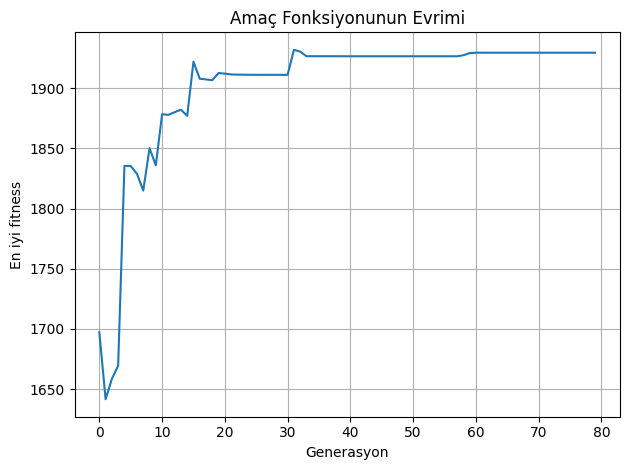

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return 3*x1 + 2*x2 + x1*x2 - 0.5*(x2**2)

def constraints_ok(x1, x2):
    if x1 < 25:
        return False
    if x1 < 10 or x1 > 80:
        return False
    if x2 < 10 or x2 > 80:
        return False
    if x1 + x2 > 100:
        return False
    return True

def create_individual():
    while True:
        x1 = random.uniform(10, 80)
        x2 = random.uniform(10, 80)
        if constraints_ok(x1, x2):
            return [x1, x2]

def create_population(size):
    return [create_individual() for _ in range(size)]

def fitness(individual):
    return objective_function(individual[0], individual[1])

def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda ind: fitness(ind), reverse=True)
    return selected[0]

def crossover(parent1, parent2):
    alpha = random.random()
    child1 = [
        alpha * parent1[0] + (1 - alpha) * parent2[0],
        alpha * parent1[1] + (1 - alpha) * parent2[1]
    ]
    child2 = [
        (1 - alpha) * parent1[0] + alpha * parent2[0],
        (1 - alpha) * parent1[1] + alpha * parent2[1]
    ]

    if not constraints_ok(child1[0], child1[1]):
        child1 = create_individual()
    if not constraints_ok(child2[0], child2[1]):
        child2 = create_individual()

    return child1, child2

def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        individual[0] += random.uniform(-5, 5)
        individual[1] += random.uniform(-5, 5)

    if not constraints_ok(individual[0], individual[1]):
        return create_individual()

    return individual

def genetic_algorithm(pop_size=40, generations=80):
    population = create_population(pop_size)
    best_values = []

    for gen in range(generations):
        new_population = []

        for _ in range(pop_size // 2):
            p1 = tournament_selection(population)
            p2 = tournament_selection(population)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            new_population.append(c1)
            new_population.append(c2)

        population = new_population

        best_ind = max(population, key=lambda ind: fitness(ind))
        best_values.append(fitness(best_ind))

        print(f"Generasyon {gen+1}: En iyi çözüm = {fitness(best_ind):.3f}")

    final_best = max(population, key=lambda ind: fitness(ind))
    return final_best, best_values

best_solution, best_graph = genetic_algorithm()

print("\n--- EN İYİ ÇÖZÜM ---")
print("x1:", best_solution[0])
print("x2:", best_solution[1])
print("En yüksek y:", fitness(best_solution))

plt.plot(best_graph)
plt.xlabel("Generasyon")
plt.ylabel("En iyi fitness")
plt.title("Amaç Fonksiyonunun Evrimi")
plt.grid(True)
plt.tight_layout()
plt.show()
